<a href="https://colab.research.google.com/github/adithyanperingode/BITS-PG-Diploma-Business-Analytics/blob/main/K_Means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
from sklearn.cluster import KMeans
from scipy.stats import zscore
from sklearn.preprocessing import LabelEncoder

In [2]:
Data_Raw = pd.read_csv("https://raw.githubusercontent.com/adithyanperingode/Datasets/master/ASM/Data_Post%20EDA.csv")
Data_Raw.head(5)
Data_Raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116 entries, 0 to 115
Data columns (total 17 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Gender                         116 non-null    object 
 1   Working_City                   116 non-null    object 
 2   Marriage status/ Kids          116 non-null    object 
 3   Annual Salary                  116 non-null    object 
 4   Age                            116 non-null    int64  
 5   Work Experience                116 non-null    int64  
 6   Average Commute Time           116 non-null    float64
 7   Industry                       116 non-null    object 
 8   Job Profile                    116 non-null    object 
 9   Work Mode                      116 non-null    object 
 10  Employment Type                116 non-null    object 
 11  Flexibility in office Timings  116 non-null    object 
 12  Number of total paid leaves    116 non-null    int

In [3]:
# Adding e one hot encoding to all catagorical columns in one shot in same data frame
Data_Raw = pd.get_dummies(Data_Raw, columns=['Gender','Working_City','Marriage status/ Kids','Industry','Job Profile','Work Mode','Employment Type','Flexibility in office Timings','Working days in Week'], dtype=int)
le = LabelEncoder()
Data_Raw["Annual Salary"] = le.fit_transform(Data_Raw["Annual Salary"])
Data_Raw.head(5)

,Annual Salary,Age,Work Experience,Average Commute Time,Number of total paid leaves,Actual Work hours per week,Expected Work hours per week,Worklife Balance,Gender_Female,Gender_Male,...,Employment Type_Contract Basis,Employment Type_Freelancing,Employment Type_Internship,Employment Type_Permanent - Company Payroll,Flexibility in office Timings_Fixed working hours,Flexibility in office Timings_Liberal working hours,Flexibility in office Timings_Semi-Fixed working hours,Working days in Week_Mon to Fri & Alternate Saturdays,Working days in Week_Mon to Fri or 5 days,Working days in Week_Mon to Sat or 6 days
0,6,31,6,0.0,40,55.0,45.0,1,0,1,...,0,0,0,1,0,0,1,0,1,0
1,2,30,3,30.0,21,54.0,45.0,1,0,1,...,0,0,0,1,1,0,0,1,0,0
2,3,28,3,90.0,22,60.0,45.0,1,0,1,...,0,0,0,1,0,0,1,1,0,0
3,7,29,4,25.0,30,50.0,45.0,1,1,0,...,0,0,0,1,1,0,0,0,0,1
4,7,29,5,15.0,0,45.0,45.0,1,0,1,...,0,0,1,0,0,1,0,0,1,0


In [4]:
# Move Worklife Balance to end column
cols = list(Data_Raw.columns)
cols.remove('Worklife Balance')
cols.append('Worklife Balance')
Data_Raw = Data_Raw[cols]
Data_Raw.head(5)

,Annual Salary,Age,Work Experience,Average Commute Time,Number of total paid leaves,Actual Work hours per week,Expected Work hours per week,Gender_Female,Gender_Male,Working_City_Bangalore,...,Employment Type_Freelancing,Employment Type_Internship,Employment Type_Permanent - Company Payroll,Flexibility in office Timings_Fixed working hours,Flexibility in office Timings_Liberal working hours,Flexibility in office Timings_Semi-Fixed working hours,Working days in Week_Mon to Fri & Alternate Saturdays,Working days in Week_Mon to Fri or 5 days,Working days in Week_Mon to Sat or 6 days,Worklife Balance
0,6,31,6,0.0,40,55.0,45.0,0,1,0,...,0,0,1,0,0,1,0,1,0,1
1,2,30,3,30.0,21,54.0,45.0,0,1,0,...,0,0,1,1,0,0,1,0,0,1
2,3,28,3,90.0,22,60.0,45.0,0,1,0,...,0,0,1,0,0,1,1,0,0,1
3,7,29,4,25.0,30,50.0,45.0,1,0,0,...,0,0,1,1,0,0,0,0,1,1
4,7,29,5,15.0,0,45.0,45.0,0,1,0,...,0,1,0,0,1,0,0,1,0,1


In [5]:
#Apply z score to data frame except Work Life balance coloumn
num_cols = Data_Raw.select_dtypes(include=['int64', 'float64']).columns
num_cols = num_cols.drop('Worklife Balance')
Data_Scaled = Data_Raw[num_cols].apply(zscore)
Data_Scaled.head()


,Annual Salary,Age,Work Experience,Average Commute Time,Number of total paid leaves,Actual Work hours per week,Expected Work hours per week,Gender_Female,Gender_Male,Working_City_Bangalore,...,Employment Type_Contract Basis,Employment Type_Freelancing,Employment Type_Internship,Employment Type_Permanent - Company Payroll,Flexibility in office Timings_Fixed working hours,Flexibility in office Timings_Liberal working hours,Flexibility in office Timings_Semi-Fixed working hours,Working days in Week_Mon to Fri & Alternate Saturdays,Working days in Week_Mon to Fri or 5 days,Working days in Week_Mon to Sat or 6 days
0,0.966433,0.096533,-0.420792,-1.297025,1.030351,0.527336,-0.04729,-0.470162,0.470162,-0.355266,...,-0.290021,-0.132453,-0.162938,0.370479,-0.885785,-0.577350,1.490712,-0.370479,0.781736,-0.590624
1,-0.461672,-0.075741,-0.913841,-0.402111,-0.569997,0.431382,-0.04729,-0.470162,0.470162,-0.355266,...,-0.290021,-0.132453,-0.162938,0.370479,1.128942,-0.577350,-0.670820,2.699206,-1.279204,-0.590624
2,-0.104646,-0.420289,-0.913841,1.387717,-0.485768,1.007109,-0.04729,-0.470162,0.470162,-0.355266,...,-0.290021,-0.132453,-0.162938,0.370479,-0.885785,-0.577350,1.490712,2.699206,-1.279204,-0.590624
3,1.323459,-0.248015,-0.749491,-0.551264,0.188063,0.047564,-0.04729,2.126925,-2.126925,-0.355266,...,-0.290021,-0.132453,-0.162938,0.370479,1.128942,-0.577350,-0.670820,-0.370479,-1.279204,1.693123
4,1.323459,-0.248015,-0.585141,-0.849568,-2.338801,-0.432209,-0.04729,-0.470162,0.470162,-0.355266,...,-0.290021,-0.132453,6.137318,-2.699206,-0.885785,1.732051,-0.670820,-0.370479,0.781736,-0.590624


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Text(0.5, 1.0, 'Selecting k with the Elbow Method')

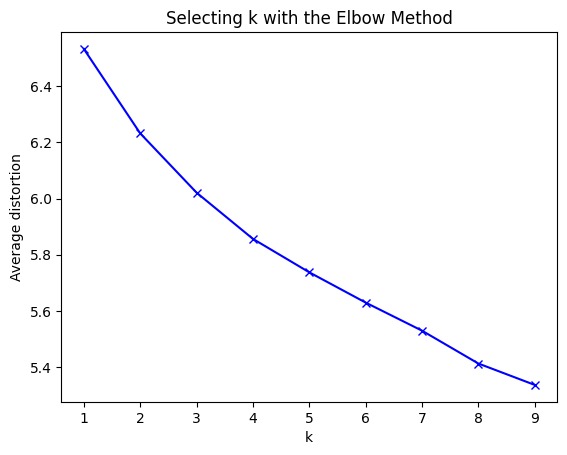

In [6]:
from scipy.spatial.distance import cdist
clusters=range(1,10)
meanDistortions=[]

for k in clusters:
    model=KMeans(n_clusters=k)
    model.fit(Data_Scaled)
    prediction=model.predict(Data_Scaled)
    meanDistortions.append(sum(np.min(cdist(Data_Scaled, model.cluster_centers_, 'euclidean'), axis=1)) / Data_Scaled.shape[0])


plt.plot(clusters, meanDistortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Average distortion')
plt.title('Selecting k with the Elbow Method')

In [7]:
# it look like 6 and 7 are bends in chart, explore cluster based on this
final_model=KMeans(6)
final_model.fit(Data_Scaled)
prediction=final_model.predict(Data_Scaled)
prediction

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([3, 3, 3, 2, 3, 3, 3, 3, 4, 4, 5, 3, 1, 4, 1, 2, 2, 2, 2, 3, 4, 3,
       0, 1, 2, 1, 4, 2, 3, 5, 5, 5, 4, 1, 1, 5, 3, 5, 5, 4, 1, 5, 5, 4,
       5, 5, 3, 4, 4, 5, 3, 3, 1, 5, 1, 4, 3, 0, 5, 2, 4, 1, 5, 5, 5, 3,
       0, 1, 0, 2, 4, 1, 2, 0, 4, 5, 3, 4, 4, 4, 5, 1, 1, 4, 4, 5, 4, 4,
       4, 4, 5, 4, 4, 1, 0, 4, 4, 0, 5, 5, 4, 1, 0, 2, 4, 4, 5, 0, 0, 0,
       0, 5, 1, 0, 5, 4], dtype=int32)

In [8]:
#Append the predictions with main dataframe
Data_Raw["Predictions"] = prediction
Data_Scaled["Predictions"] = prediction
Data_Raw.head(5)

,Annual Salary,Age,Work Experience,Average Commute Time,Number of total paid leaves,Actual Work hours per week,Expected Work hours per week,Gender_Female,Gender_Male,Working_City_Bangalore,...,Employment Type_Internship,Employment Type_Permanent - Company Payroll,Flexibility in office Timings_Fixed working hours,Flexibility in office Timings_Liberal working hours,Flexibility in office Timings_Semi-Fixed working hours,Working days in Week_Mon to Fri & Alternate Saturdays,Working days in Week_Mon to Fri or 5 days,Working days in Week_Mon to Sat or 6 days,Worklife Balance,Predictions
0,6,31,6,0.0,40,55.0,45.0,0,1,0,...,0,1,0,0,1,0,1,0,1,3
1,2,30,3,30.0,21,54.0,45.0,0,1,0,...,0,1,1,0,0,1,0,0,1,3
2,3,28,3,90.0,22,60.0,45.0,0,1,0,...,0,1,0,0,1,1,0,0,1,3
3,7,29,4,25.0,30,50.0,45.0,1,0,0,...,0,1,1,0,0,0,0,1,1,2
4,7,29,5,15.0,0,45.0,45.0,0,1,0,...,1,0,0,1,0,0,1,0,1,3


In [9]:
Data_Clusters = Data_Raw.groupby(['Predictions'])
Data_Clusters.mean()

,Annual Salary,Age,Work Experience,Average Commute Time,Number of total paid leaves,Actual Work hours per week,Expected Work hours per week,Gender_Female,Gender_Male,Working_City_Bangalore,...,Employment Type_Freelancing,Employment Type_Internship,Employment Type_Permanent - Company Payroll,Flexibility in office Timings_Fixed working hours,Flexibility in office Timings_Liberal working hours,Flexibility in office Timings_Semi-Fixed working hours,Working days in Week_Mon to Fri & Alternate Saturdays,Working days in Week_Mon to Fri or 5 days,Working days in Week_Mon to Sat or 6 days,Worklife Balance
Predictions,,,,,,,,,,,,,,,,,,,,,
0,5.230769,30.384615,10.307692,52.435897,30.538462,63.000000,54.769231,0.000000,1.000000,0.000000,...,0.000000,0.000000,1.000000,0.538462,0.230769,0.230769,0.153846,0.153846,0.692308,0.846154
1,4.823529,28.470588,6.941176,32.352941,34.352941,43.235294,41.794118,0.470588,0.529412,0.235294,...,0.058824,0.000000,0.882353,0.000000,0.705882,0.294118,0.058824,0.882353,0.058824,0.882353
2,0.818182,27.363636,4.454545,23.000000,17.636364,43.909091,43.000000,0.545455,0.454545,0.090909,...,0.000000,0.090909,0.909091,0.727273,0.181818,0.090909,0.090909,0.000000,0.909091,1.000000
3,2.888889,28.222222,4.500000,57.222222,27.611111,48.194444,44.638889,0.055556,0.944444,0.111111,...,0.000000,0.111111,0.833333,0.500000,0.111111,0.388889,0.222222,0.777778,0.000000,0.888889
4,2.709677,36.322581,14.645161,48.225806,32.354839,49.516129,44.564516,0.000000,1.000000,0.000000,...,0.000000,0.000000,1.000000,0.354839,0.161290,0.483871,0.064516,0.806452,0.129032,0.903226
5,3.346154,27.576923,6.038462,39.769231,21.000000,50.115385,45.461538,0.230769,0.769231,0.230769,...,0.038462,0.000000,0.692308,0.615385,0.192308,0.192308,0.153846,0.615385,0.230769,0.730769


array([[<Axes: title={'center': 'Actual Work hours per week'}, xlabel='[Predictions]'>,
        <Axes: title={'center': 'Age'}, xlabel='[Predictions]'>,
        <Axes: title={'center': 'Annual Salary'}, xlabel='[Predictions]'>],
       [<Axes: title={'center': 'Average Commute Time'}, xlabel='[Predictions]'>,
        <Axes: title={'center': 'Employment Type_Contract Basis'}, xlabel='[Predictions]'>,
        <Axes: title={'center': 'Employment Type_Freelancing'}, xlabel='[Predictions]'>],
       [<Axes: title={'center': 'Employment Type_Internship'}, xlabel='[Predictions]'>,
        <Axes: title={'center': 'Employment Type_Permanent - Company Payroll'}, xlabel='[Predictions]'>,
        <Axes: title={'center': 'Expected Work hours per week'}, xlabel='[Predictions]'>],
       [<Axes: title={'center': 'Flexibility in office Timings_Fixed working hours'}, xlabel='[Predictions]'>,
        <Axes: title={'center': 'Flexibility in office Timings_Liberal working hours'}, xlabel='[Predictions]'>,

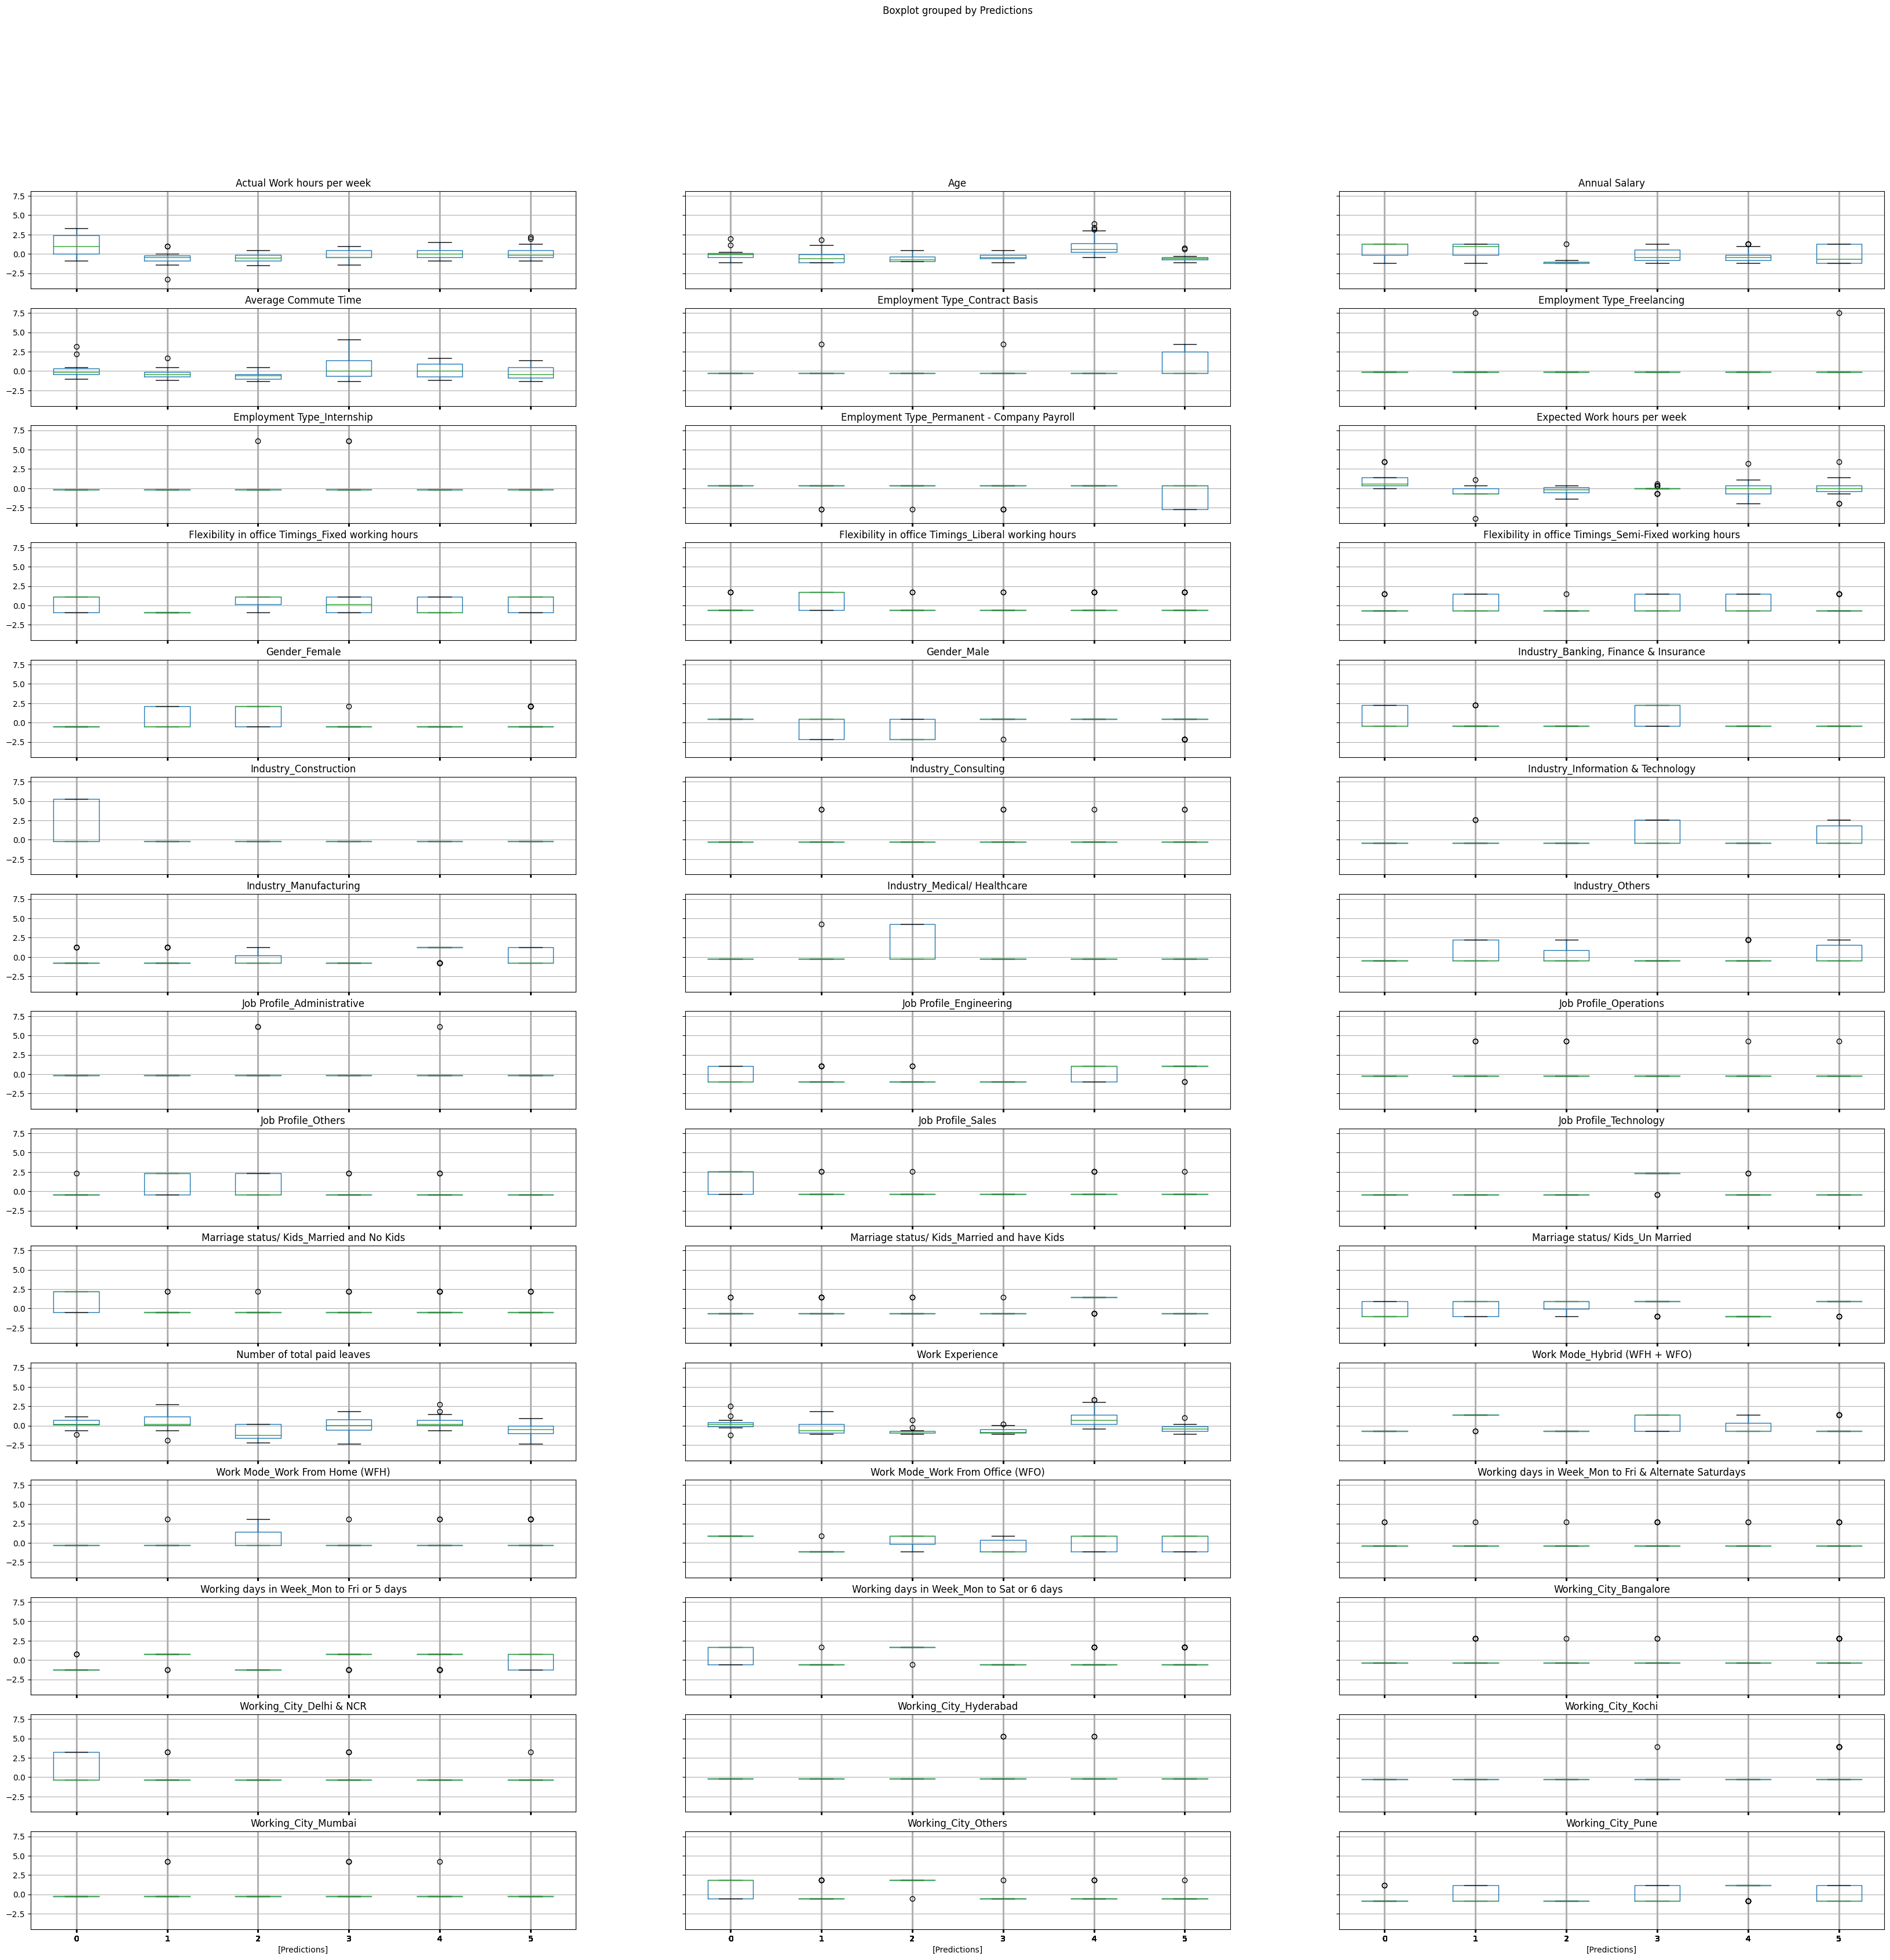

In [10]:
Data_Scaled.boxplot(by='Predictions', layout = (15,3),figsize=(40,40))

array([[<Axes: title={'center': 'Actual Work hours per week'}, xlabel='[Predictions]'>,
        <Axes: title={'center': 'Age'}, xlabel='[Predictions]'>,
        <Axes: title={'center': 'Annual Salary'}, xlabel='[Predictions]'>],
       [<Axes: title={'center': 'Average Commute Time'}, xlabel='[Predictions]'>,
        <Axes: title={'center': 'Employment Type_Contract Basis'}, xlabel='[Predictions]'>,
        <Axes: title={'center': 'Employment Type_Freelancing'}, xlabel='[Predictions]'>],
       [<Axes: title={'center': 'Employment Type_Internship'}, xlabel='[Predictions]'>,
        <Axes: title={'center': 'Employment Type_Permanent - Company Payroll'}, xlabel='[Predictions]'>,
        <Axes: title={'center': 'Expected Work hours per week'}, xlabel='[Predictions]'>],
       [<Axes: title={'center': 'Flexibility in office Timings_Fixed working hours'}, xlabel='[Predictions]'>,
        <Axes: title={'center': 'Flexibility in office Timings_Liberal working hours'}, xlabel='[Predictions]'>,

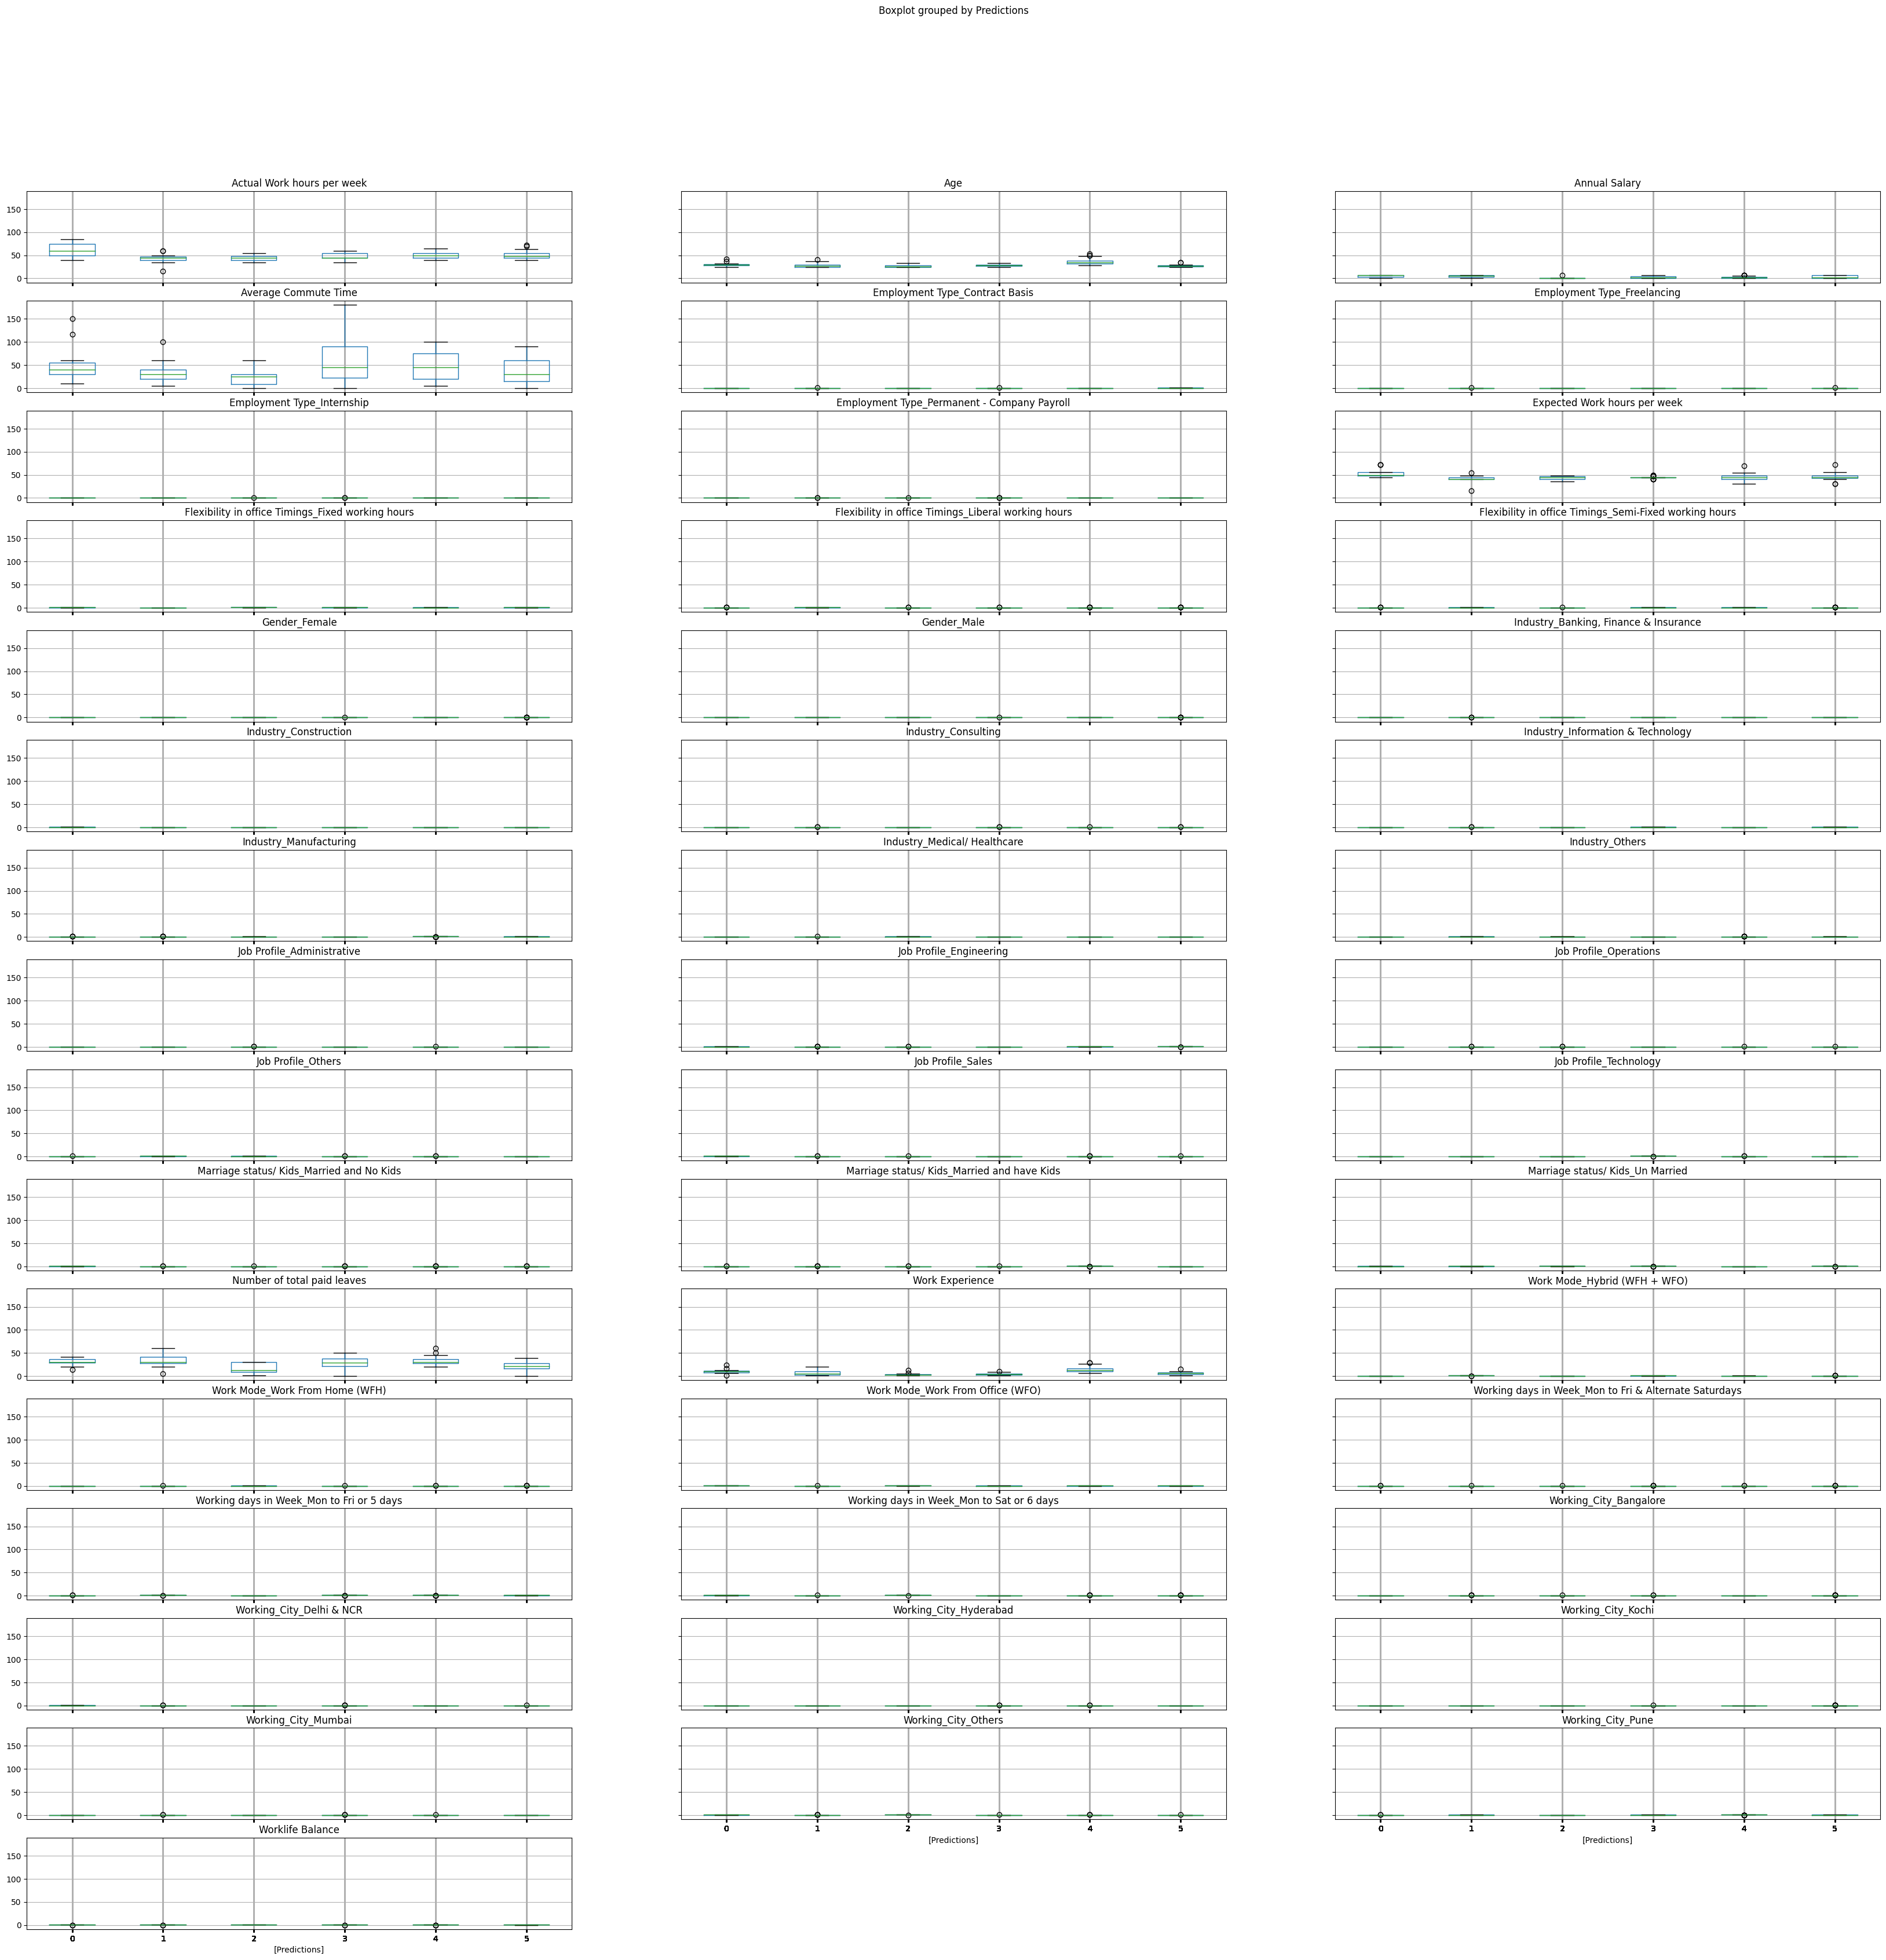

In [12]:
Data_Raw.boxplot(by='Predictions', layout = (16,3),figsize=(40,40))